# Pipeline Project

You will be using the provided data to create a machine learning model pipeline.

You must handle the data appropriately in your pipeline to predict whether an
item is recommended by a customer based on their review.
Note the data includes numerical, categorical, and text data.

You should ensure you properly train and evaluate your model.

## The Data

The dataset has been anonymized and cleaned of missing values.

There are 8 features for to use to predict whether a customer recommends or does
not recommend a product.
The `Recommended IND` column gives whether a customer recommends the product
where `1` is recommended and a `0` is not recommended.
This is your model's target/

The features can be summarized as the following:

- **Clothing ID**: Integer Categorical variable that refers to the specific piece being reviewed.
- **Age**: Positive Integer variable of the reviewers age.
- **Title**: String variable for the title of the review.
- **Review Text**: String variable for the review body.
- **Positive Feedback Count**: Positive Integer documenting the number of other customers who found this review positive.
- **Division Name**: Categorical name of the product high level division.
- **Department Name**: Categorical name of the product department name.
- **Class Name**: Categorical name of the product class name.

The target:
- **Recommended IND**: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

## Load Data

In [2]:
import pandas as pd

# Load data
df = pd.read_csv(
    'data/reviews.csv',
)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18442 entries, 0 to 18441
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Clothing ID              18442 non-null  int64 
 1   Age                      18442 non-null  int64 
 2   Title                    18442 non-null  object
 3   Review Text              18442 non-null  object
 4   Positive Feedback Count  18442 non-null  int64 
 5   Division Name            18442 non-null  object
 6   Department Name          18442 non-null  object
 7   Class Name               18442 non-null  object
 8   Recommended IND          18442 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.3+ MB


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name,Recommended IND
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses,0
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants,1
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses,1
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses,0
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits,1


## Preparing features (`X`) & target (`y`)

In [3]:
data = df

# separate features from labels
X = data.drop('Recommended IND', axis=1)
y = data['Recommended IND'].copy()

print('Labels:', y.unique())
print('Features:')
display(X.head())

Labels: [0 1]
Features:


,Clothing ID,Age,Title,Review Text,Positive Feedback Count,Division Name,Department Name,Class Name
0,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,0,General,Dresses,Dresses
1,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",0,General Petite,Bottoms,Pants
2,847,47,Flattering shirt,This shirt is very flattering to all due to th...,6,General,Tops,Blouses
3,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",4,General,Dresses,Dresses
4,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,1,General Petite,Tops,Knits


In [ ]:
# Split data into train and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.1,
    shuffle=True,
    random_state=27,
)

# Your Work

## Data Exploration

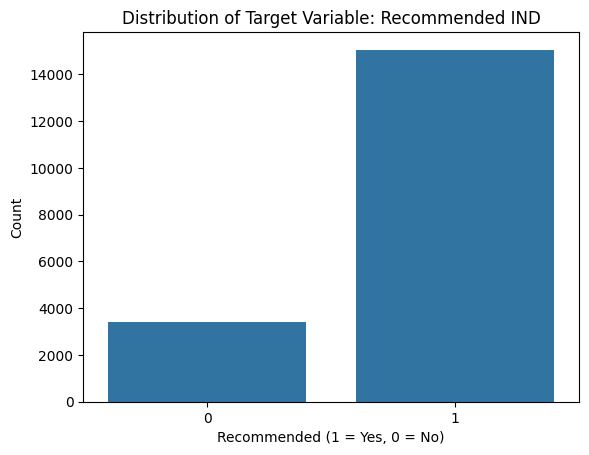

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt



#analysis of the target vairiable

sns.countplot(x=y)
plt.title("Distribution of Target Variable: Recommended IND")
plt.xlabel("Recommended (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()

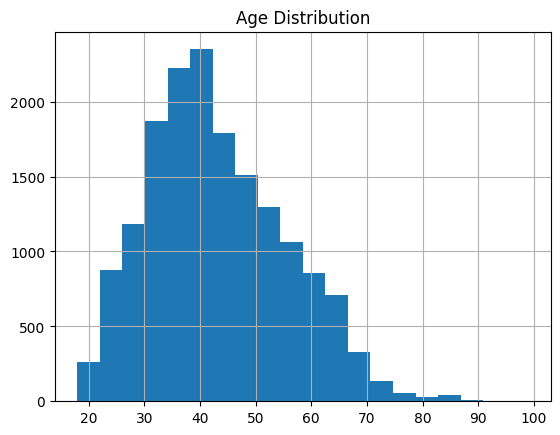

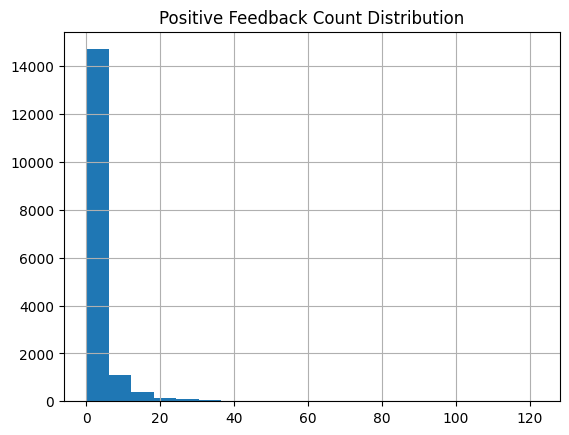

In [ ]:
#histogram for numerical features

X_train[['Age', 'Positive Feedback Count']].describe()

X_train['Age'].hist(bins=20)
plt.title("Age Distribution")
plt.show()

X_train['Positive Feedback Count'].hist(bins=20)
plt.title("Positive Feedback Count Distribution")
plt.show()


Division Name Value Counts:
Division Name
General           10497
General Petite     6100
Name: count, dtype: int64


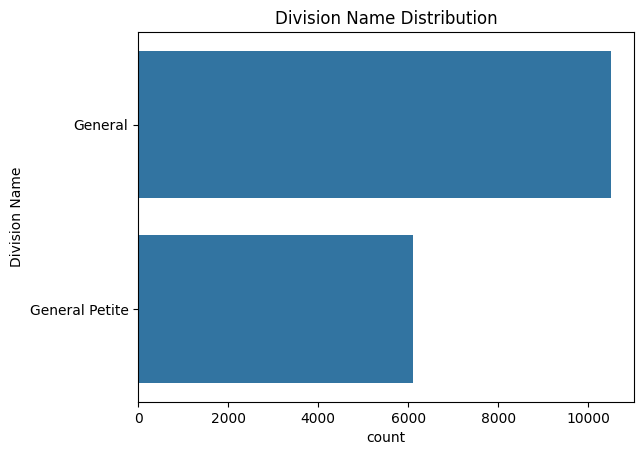


Department Name Value Counts:
Department Name
Tops        7818
Dresses     4845
Bottoms     2852
Jackets      813
Intimate     172
Trend         97
Name: count, dtype: int64


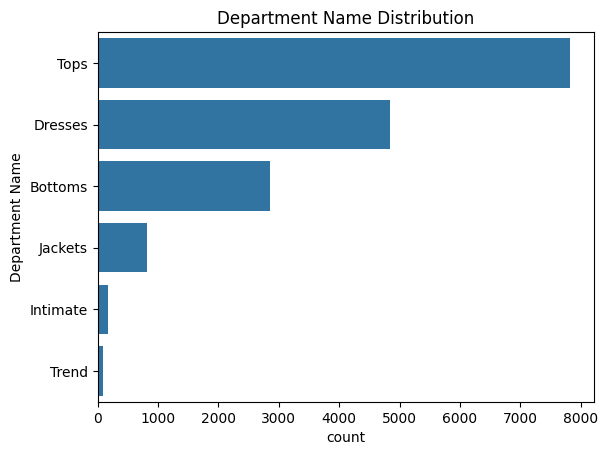


Class Name Value Counts:
Class Name
Dresses           4845
Knits             3554
Blouses           2337
Sweaters          1095
Pants             1041
Jeans              885
Fine gauge         832
Skirts             693
Jackets            549
Outerwear          264
Shorts             232
Lounge             172
Trend               97
Casual bottoms       1
Name: count, dtype: int64


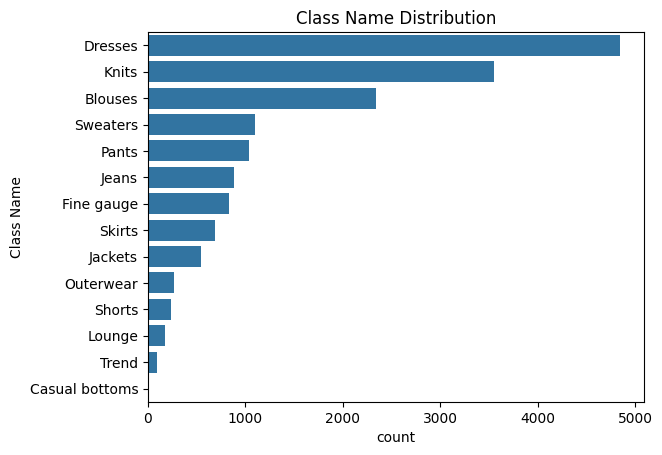

In [ ]:
#analysis for the top values

for col in ['Division Name', 'Department Name', 'Class Name']:
    print(f"\n{col} Value Counts:")
    print(X_train[col].value_counts())

    sns.countplot(y=X_train[col], order=X_train[col].value_counts().index)
    plt.title(f"{col} Distribution")
    plt.show()

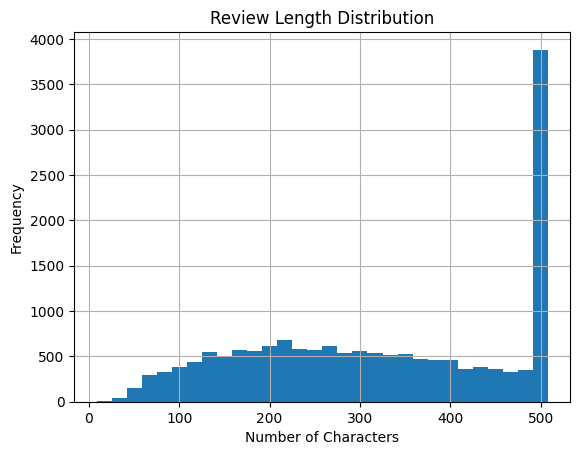

In [ ]:
#analysis of Text Features

X_train['Review Length'] = X_train['Review Text'].astype(str).apply(len)
X_train['Review Length'].hist(bins=30)
plt.title("Review Length Distribution")
plt.xlabel("Number of Characters")
plt.ylabel("Frequency")
plt.show()

## Building Pipeline

In [ ]:
#import libraries

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression



In [ ]:
#group numerical and categorical columns

num_features = ['Age', 'Positive Feedback Count']
cat_features = ['Division Name', 'Department Name', 'Class Name']
text_feature = 'Review Text'

In [21]:
#numerical pipeline
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#categorical pipeline
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#text pipeline
text_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=1000, stop_words='english'))
])

In [22]:
#include column transformer

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_features),
    ('cat', cat_pipeline, cat_features),
    ('text', text_pipeline, text_feature)
])

model_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000))
])

## Training Pipeline

In [23]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Age',
                                                   'Positive Feedback Count']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['Division Name',
                                                   'Department Name',
                                                   'Class Name']),
                                                 ('text',
                                                  Pipeline(steps=[('tfidf',
                                                                   TfidfVectorizer(max_features=1000,
                                                                                   stop_words='english'))]),
                                                  'Review Text')])),
                ('classifier', LogisticRegression(max_iter=1000))])

## Fine-Tuning Pipeline

In [ ]:
from sklearn.model_selection import GridSearchCV

#define parameter grid

param_grid = {
    'classifier__C': [0.01, 0.1, 1, 10],
    'classifier__penalty': ['l2'],
    'classifier__solver': ['liblinear']  
}

#include gridsearch

grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    scoring='f1',           
    cv=5,              
    verbose=2,
    n_jobs=-1              
)


#train grid search

grid_search.fit(X_train, y_train)





Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['Age',
                                                                          'Positive '
                                                                          'Feedback '
                                                                          'Count']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore')...
                                                                         ['Division '
                                                                          'Name',
                                                                          'Department '
                                                                          'Name',
                                                                          'Class '
                                                                          'Name']),
                                                                        ('text',
                                                                         Pipeline(steps=[('tfidf',
                                                                                          TfidfVectorizer(max_features=1000,
                                                                                                          stop_words='english'))]),
                                                                         'Review '
                                                                         'Text')])),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000))]),
             n_jobs=-1,
             param_grid={'classifier__C': [0.01, 0.1, 1, 10],
                         'classifier__penalty': ['l2'],
                         'classifier__solver': ['liblinear']},
             scoring='f1', verbose=2)

In [32]:
print("Best parameters:", grid_search.best_params_)
print("Best F1 score:", grid_search.best_score_)

Best parameters: {'classifier__C': 1, 'classifier__penalty': 'l2', 'classifier__solver': 'liblinear'}
Best F1 score: 0.9295057619240478


In [33]:
#evaulate the best model


from sklearn.metrics import classification_report, confusion_matrix

y_pred_best = grid_search.predict(X_test)

print("Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.52      0.60       327
           1       0.90      0.96      0.93      1518

    accuracy                           0.88      1845
   macro avg       0.81      0.74      0.77      1845
weighted avg       0.87      0.88      0.87      1845

Confusion Matrix:
 [[ 170  157]
 [  67 1451]]


#Summary

The logistic regression model performed well on the test data, the precision and recall scores are balanced. It effectively leveraged the data to predict customer recommendations. The model generalizes well and shows consistent performance.